In [1]:
# Simple linear Regression using Synthetic Data

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
# need to define functions that build and train a model
# build_model(my_learning_rate) --> includes and empty model
# train_model(model,feature,label,epochs) --> that trains the model from example


In [4]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [5]:
#define the plotting function
# we w'll create the plot using matlplotlib
# 1st plot- feature vals v/s label vals
# loss curve

In [6]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

In [7]:
def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [8]:
my_feature= ([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0])
my_label=([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])


In [12]:
print(len(my_label))
print(len(my_feature))

12
12


In [9]:
# learn about the hyper parameters
# learning rate
# epochs
# batch_size

Epoch 1/10
1/1 [==============================] - 1s 641ms/step - loss: 734.3511 - root_mean_squared_error: 27.0989
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 720.2800 - root_mean_squared_error: 26.8380
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 710.2034 - root_mean_squared_error: 26.6496
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 701.8439 - root_mean_squared_error: 26.4923
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 694.4802 - root_mean_squared_error: 26.3530
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 687.7776 - root_mean_squared_error: 26.2255
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 681.5504 - root_mean_squared_error: 26.1065
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 675.6824 - root_mean_squared_error: 25.9939
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 670.0966 - root_

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


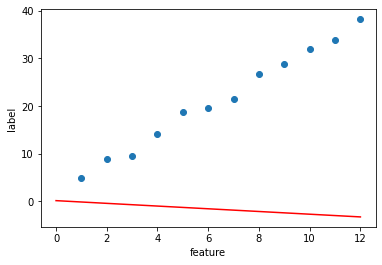

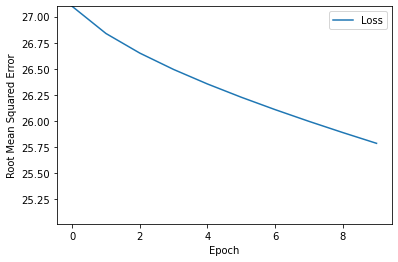

In [13]:

learning_rate=0.01
epochs=10;
my_batch_size=12

my_model = build_model(learning_rate)

trained_weight,trained_bias,epochs,rmse= train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

In [14]:
# the loss curve decreases and doesn't flatten out that means the model hasn't
# trained sufficiently

Epoch 1/1000
1/1 [==============================] - 0s 294ms/step - loss: 302.4523 - root_mean_squared_error: 17.3912
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 293.4524 - root_mean_squared_error: 17.1305
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 287.0547 - root_mean_squared_error: 16.9427
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 281.7753 - root_mean_squared_error: 16.7862
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 277.1452 - root_mean_squared_error: 16.6477
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 272.9474 - root_mean_squared_error: 16.5211
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 269.0613 - root_mean_squared_error: 16.4031
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 265.4118 - root_mean_squared_error: 16.2915
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


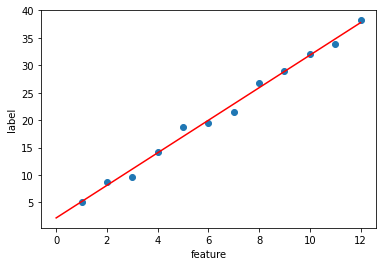

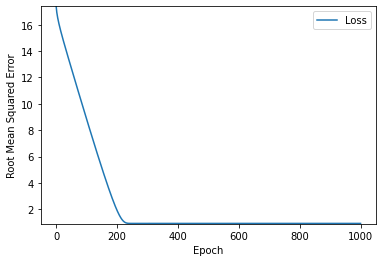

In [15]:
learning_rate=0.01
epochs=1000;
my_batch_size=12

my_model = build_model(learning_rate)

trained_weight,trained_bias,epochs,rmse= train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Epoch 1/500
3/3 [==============================] - 0s 3ms/step - loss: 2310230.4319 - root_mean_squared_error: 1322.3281
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 41.9629 - root_mean_squared_error: 6.3652
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 1.6682 - root_mean_squared_error: 1.2889
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 1.7568 - root_mean_squared_error: 1.3020
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 1.6593 - root_mean_squared_error: 1.2848
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 27.5678 - root_mean_squared_error: 5.2325
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 1.2037 - root_mean_squared_error: 1.0898
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 1.4949 - root_mean_squared_error: 1.1901
Epoch 9/500
3/3 [==============================] - 0s 3ms/step - loss: 128.3780 - root_mean_s

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


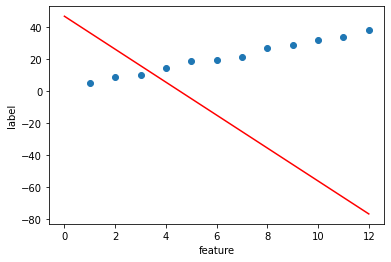

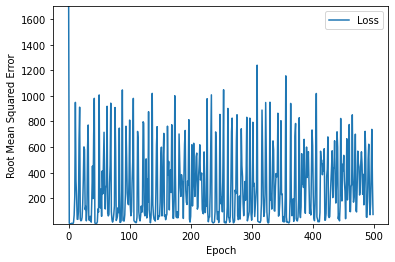

In [20]:
learning_rate=100
epochs=500;
my_batch_size=5

my_model = build_model(learning_rate)

trained_weight,trained_bias,epochs,rmse= train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Epoch 1/500
1/1 [==============================] - 0s 286ms/step - loss: 931.4888 - root_mean_squared_error: 30.5203
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 884.3270 - root_mean_squared_error: 29.7376
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 851.2915 - root_mean_squared_error: 29.1769
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 824.3200 - root_mean_squared_error: 28.7110
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 800.8784 - root_mean_squared_error: 28.2998
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 779.7961 - root_mean_squared_error: 27.9248
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 760.4235 - root_mean_squared_error: 27.5758
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 742.3579 - root_mean_squared_error: 27.2462
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 725.330

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


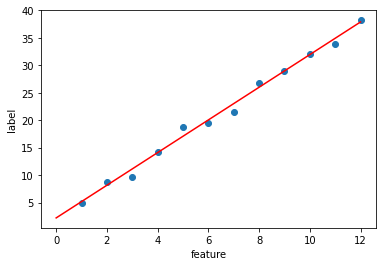

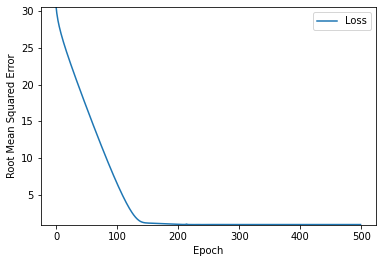

In [17]:
learning_rate=0.03
epochs=500;
my_batch_size=12

my_model = build_model(learning_rate)

trained_weight,trained_bias,epochs,rmse= train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 873.7721 - root_mean_squared_error: 29.5556
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 750.7150 - root_mean_squared_error: 27.3933
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 674.2249 - root_mean_squared_error: 25.9583
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 581.3148 - root_mean_squared_error: 24.0515
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 564.1758 - root_mean_squared_error: 23.7438
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 540.9740 - root_mean_squared_error: 23.2588
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 462.0855 - root_mean_squared_error: 21.4485
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 425.8814 - root_mean_squared_error: 20.5881
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 420.2770 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


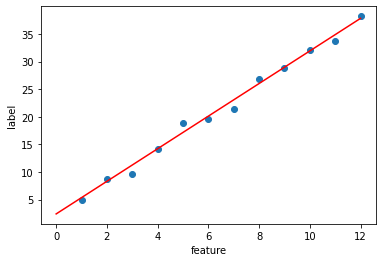

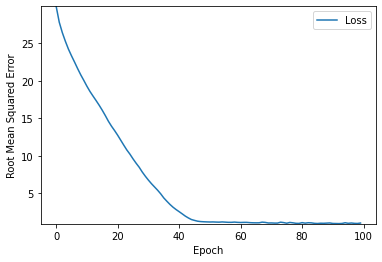

In [19]:
learning_rate=0.05
epochs=100
my_batch_size= 8

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
# note to myself:
# always try to find the best hyper-parameters for training the model